# Predicting the Payment Method

## Build a model for predicting the payment method based on given data

### Step 1: Analyse the data

In [7]:
import pandas as pd

# Load the data file
df = pd.read_csv("Fero_ML_exercise_data.csv")

#Analyse the data
print(df['payment_method'].unique()) # Number of classes
df.shape # Number of samples in given dataset
df.info()

['paypal' 'visa' 'mastercard' 'apple_pay' 'clearpay' 'american_express'
 'discover' 'klarna' 'bancontact' 'sofort' 'ideal' 'google_pay'
 'gift_card' 'afterpay' 'cash app pay' 'gift card' 'amazon_pay' 'manual'
 'mobilepay' 'diners_club' 'jcb' 'cash on delivery' 'twint'
 'volt: pay by bank']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135186 entries, 0 to 135185
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   session_id                         135186 non-null  object 
 1   number_of_cart_updates             135186 non-null  float64
 2   average_time_between_cart_updates  135186 non-null  float64
 3   minimum_time_between_cart_updates  135186 non-null  float64
 4   maximum_time_between_cart_updates  135186 non-null  float64
 5   median_time_between_cart_updates   135186 non-null  float64
 6   std_dev_time_between_cart_updates  135186 non-null  float64
 7   number_o

In [8]:
# handling missing values

missing_values = df.isnull().sum()

# Check the percentage of missing values for each column
percentage_missing = (missing_values / len(df)) * 100
print(percentage_missing)

df.dropna(inplace=True) # Removing rows with missing values
hashed_columns = ['session_id', 'shop']

# Remove the hashed columns from the DataFrame
df_cleaned = df.drop(columns=hashed_columns)
# df_cleaned.info()

session_id                            0.000000
number_of_cart_updates                0.000000
average_time_between_cart_updates     0.000000
minimum_time_between_cart_updates     0.000000
maximum_time_between_cart_updates     0.000000
median_time_between_cart_updates      0.000000
std_dev_time_between_cart_updates     0.000000
number_of_product_variant_changes     0.000000
average_cart_variant_count            0.000000
shop_currency                         1.116980
customer_currency                     0.000000
normalized_cart_value                 0.000000
is_web_crawler                       13.380084
is_bot_traffic                       13.380084
is_vpn_connection                    13.380084
is_proxy_connection                  13.380084
is_tor_connection                    13.380084
customer_timezone                    13.428166
customer_country                     13.380823
user_agent_family                    12.585623
user_agent_device                    12.585623
number_items 

### Step 2 : Feature Selection

In [11]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# Seperate categorical and numerical variables
categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Use LabelEncoder to convert categorical columns into numeric 
le = LabelEncoder()
for col in categorical_features:
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
    
# Apply scaling to the numerical columns
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Split features and target variable
X = df_cleaned.drop(columns=['payment_method'])  # Drop the target column
y = df_cleaned['payment_method']  # Target variable

# Compute mutual information between features and target variable
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Get top 10 features based on mutual information
top_10_features_mutual_info = mutual_info_series.head(10)
print("Top 10 features based on Mutual Information with payment_method:\n", top_10_features_mutual_info)

# Choose top 5 features 
selected_features = ['user_agent_device', 'normalized_cart_value', 'customer_country', 'customer_currency', 'shop_currency']
X = df_cleaned[selected_features]
X.info()
y.info()

Top 10 features based on Mutual Information with payment_method:
 user_agent_family           0.146468
user_agent_device           0.143016
normalized_cart_value       0.107410
checkout_customer_locale    0.098424
customer_country            0.091937
customer_timezone           0.086767
shop_currency               0.073190
customer_currency           0.070884
checkout_updated_at         0.047825
cart_updated_at             0.045416
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 108056 entries, 0 to 135185
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_agent_device      108056 non-null  float64
 1   normalized_cart_value  108056 non-null  float64
 2   customer_country       108056 non-null  float64
 3   customer_currency      108056 non-null  float64
 4   shop_currency          108056 non-null  float64
dtypes: float64(5)
memory usage: 4.9 MB
<class 'pandas.core.series.Series

### Step 3 : Train the model

In [12]:
# Split train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Step 4: Evaluate the model

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.06      0.12      0.08       683
           3       0.38      0.46      0.42      4775
           4       0.58      1.00      0.74         7
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.05      0.11      0.07       647
           9       0.05      0.14      0.08        22
          10       0.07      0.33      0.11         3
          11       0.01      0.21      0.02       145
          12       0.10      0.59      0.17       408
          13       0.80      0.89      0.84       291
          14       0.00      0.00      0.00         2
          15       0.17      0.22      0.19      1602
          16       0.00      0.00      0.00         6
          17       0.29      0.12      0.17      4776
    

C:\Users\safi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\safi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\safi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:15

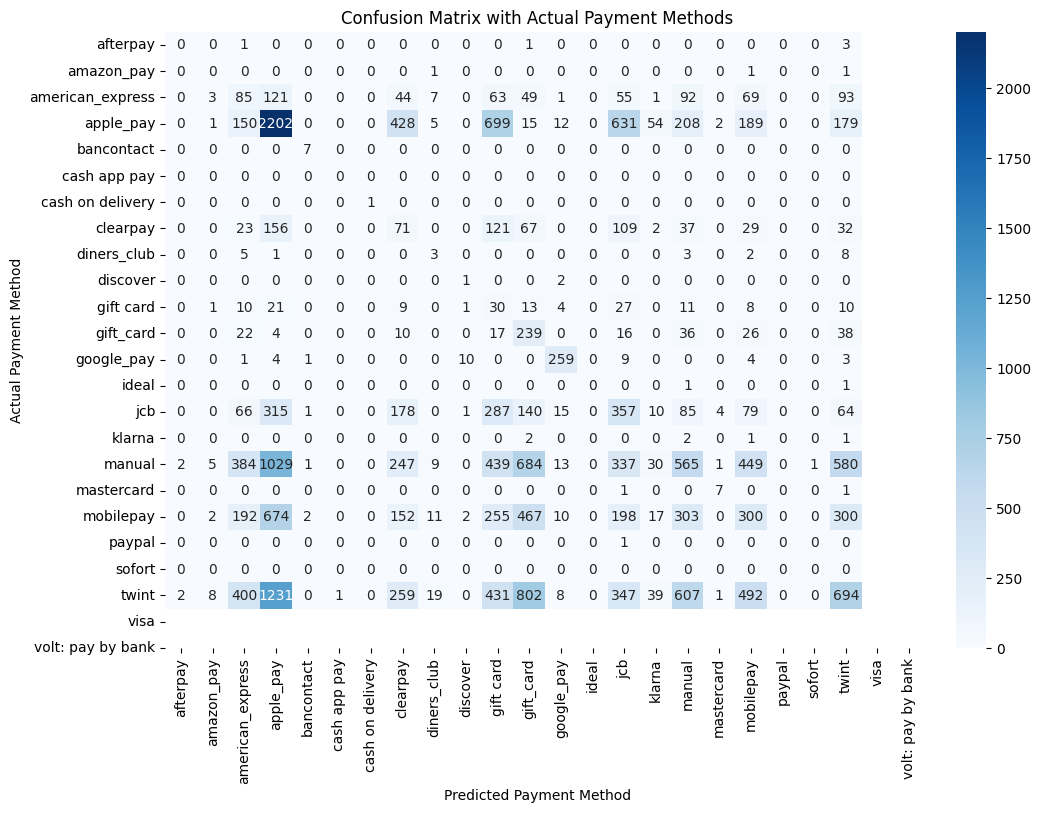

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

actual_payment_methods = le.inverse_transform(y_test)
predicted_payment_methods = le.inverse_transform(y_pred)
report = classification_report(actual_payment_methods, predicted_payment_methods)
payment_method_labels = le.classes_
cm = confusion_matrix(actual_payment_methods, predicted_payment_methods)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=payment_method_labels, yticklabels=payment_method_labels)
plt.xlabel('Predicted Payment Method')
plt.ylabel('Actual Payment Method')
plt.title('Confusion Matrix with Actual Payment Methods')
plt.show()